딥러닝 작성할 때는 GPU 사용 권장 \
(수정 - 노트설정 - T4 GPU)

# Deep Learning 개요
- 최초의 인공지능 모델의 개요
    - 몇십년이 지나도 발전X(1과 0밖에 출력하지 못한다.)
    - 연구자들이 퍼셉트론을 여러개로 쌓아 관리하기로 함
    - 여러개의 퍼셉트론이 동시에 작동 (층을 만들어 모두 연결하기 시작)
    - MLP 구조 (Multi Layer Perceptron)
    - 딥러닝이라고 불리게 된다. 딥러닝의 시초
- AI ≠ 딥러닝
- AI > ML >DL
- Deep Learning
  - 모든 상황에 다 사용하지만 자원을 많이 쓰기 때문에 (cpu, ram, 시간 …) 무겁다.
- ML vs DL
  - 소량의 데이터는 ML, 대량의 데이터는 DL 사용한다.
  - 정형 데이터에 대한 모델링은 ML, 비정형 데이터에 대한 모델링은 DL 사용한다.
    - 비정형 데이터: 이미지, 자연어를 의미한다. (3차원 이상의 데이터(Tensor))
- Deep Learning Framework
  - Tensorflow (keras)
    - pytorch보다 상대적으로 가볍다
    - 배포용, 모바일 앱 등 다방면에 사용된다.
  - Pytorch
    - 연구용 혹은 구현 목적으로 많이 사용한다.

# Tensorflow를 이용한 모델링

## 데이터 확인

In [8]:
import tensorflow as tf
from tensorflow.keras import datasets

In [9]:
# 데이터 로드 후 분할

mnist = datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [10]:
# 훈련 데이터의 크기 확인
#   6000장의 사진이 있고, 각 사진은 28x28 이라는 것을 알 수 있다.

X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

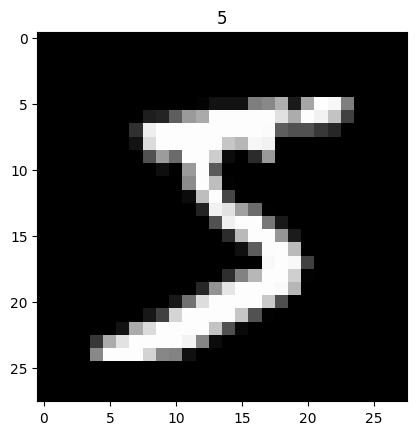

In [11]:
import matplotlib.pyplot as plt

image = X_train[0]

plt.title(y_train[0])
plt.imshow(image, 'gray')
plt.show()

## Keras를 이용한 모델
- `tensorflow`를 기반으로 하는 유명한 논문, 레이어들을 구현한 패키지
- keras를 사용한다 == tensorflow를 사용한다

## Fully Connected Layer 모델링
* 추론, 예측하는 역할
* 레이어들은 `tf.keras.layers` 패키지에 모두 들어 있다.
* `Flatten Layer` : 배치(BATCH)를 제외한 평탄화 담당
  * `numpy` 할 때는 `reshape`, 배치 개수 따로 빼고 해야 했는데, 여기선 그럴 필요가 없다.
* `Dense Layer` : `Affine`연산(신경망의 행렬 내적 계산). **Fully Connected**
  * `Dense Layer` 파라미터에 `activation`을 지정 가능
  * 모든 데이터를 모든 뉴런이 받을 수 있도록 연결한다. (fully connected!)
  * dense layer 만들기 위해서는 무조건 flatten 해야 한다.
* `Activation Layer` : 활성화 함수 레이어(선택에 따라서 사용을 안할 수도 있다.)

In [12]:
from tensorflow.keras.layers import Dense, Flatten, Activation, Input

# 입력층
input = Input(shape=(28, 28))

# 평탄화
net = Flatten()(input)

# 은닉층 (+활성화함수)
net = Dense(512)(net)
net = Activation('relu')(net)

net = Dense(256)(net)
net = Activation('relu')(net)

# 출력
net = Dense(10)(net)
y = Activation('softmax')(net)

- 입력층(input layer):
  - 데이터가 입력되는 층
  - 데이터의 입력 정보를 알려준다.
  - 배치(batch) 사이즈를 제외한 shape을 지정한다.(이미지 크기 지정)
    - batch: 모델의 가중치를 한번 업데이트시킬 때 사용되는 샘플들의 묶음
- Flatten:
  - 입력된 input 데이터를 평탄화 한다.
- 은닉층(hidden layer):
  - 실제 wx+b의 연산이 일어나는 층
  - 내적이 발생한다.
  - 은닉층과 활성화 함수는 하나의 세트로 생각해야 한다.
- 출력층(output layer):
  - 항상 마지막에 위치하며, 예측 결과를 내보내는 층
  - 항상 Dense로 만든다.
  - 출력층의 유닛 개수는 클래스의 개수와 동일해야 한다.
- Activation Function (활성화 함수)
  - z 값에 적용하는 함수
  - 기존에 z가 0보다 크면 1, 0보다 작으면 0이라는 계단함수가 존재했으나, 이 함수만 있으면 단조롭기 때문에 추가적인 활성화 함수가 적용되기 시작했다.
  - 종류:
    - sigmoid
    - ReLU
      - z가 0보다 크면 z, 작으면 0이 된다.
      - 이미지 처리에 두각을 나타내며, 여러 곳에 아주 많이 사용된다.
    - tanh
      - sigmoid와 유사하나 차이점은 -1에서 1 사이의 값을 갖는다.
      - 자연어 처리에 두각을 나타낸다.
- softmax:
  - 특정 클래스로 분류될만한 확률을 계산해주는 함수
  - logistic regression 다중분류와 달리, 간단한 함수를 사용하여 값이 크면 가장 큰 확률을 가질 수 있도록 계산 가능하다.
  - 따라서 softmax 함수의 합은 1이 된다.

In [13]:
# 모델 생성
#   입력층과 출력층을 지정한다.
#   ex. (60000, 28, 28) => (이미지의 개수, 이미지 가로 크기, 이미지 세로 크기)
#   512, 256은 임의의 숫자로, 무슨 수를 넣어도 무관하다 (?)
#   은닉층은 쭉 활성화함수 ReLU를 사용하다 출력층 활성화함수로 softmax 사용.
#   출력층의 유닛 개수는 클래스 개수와 동일하다.

model = tf.keras.Model(inputs=input, outputs=y, name='BASIC_MNIST')
model.summary()

Model: "BASIC_MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 activation_3 (Activation)   (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                

**<<상기 그래프>>**
- 아직 batch 사이즈 지정 전이기 때문에 None으로 입력되었다.
- 입력층과 출력층만 지정된 현재 모델의 구조를 summary로 확인 가능하다.
- 계획만 짠 상태!

## 최적화 계획 세우기
* `Loss Function`(손실 함수) - MSE, CEE를 쓸지를 결정
  * 실제값과 오값의 오차
* `Optimization`(최적화 함수) - SGD, ADAM, RMSProps 등을 지정
  * 손실 함수를 최소화 시키기 위한 함수
  * 대부분 Gradiant Decent 종류로, 어떤 경사하강법을 쓸지를 결정 (보통 초보자는 ADAM 사용)
  * 거의 대부분 ADAM, RMSProps 등을 기본으로 사용
* `Metrics` - 테스트 세트에 대한 평가 기준
  * `acc`, `recall`, `precision`

### Loss Function 선정 기준 ⭐
* 이진 분류를 수행하는 경우(Binary Classification)
  * `mse` : 출력층의 뉴런이 1개인 경우 - with `sigmoid`
    * 로지스틱 회귀의 mse처럼, 딥러닝을 사용할 때 mse 사용
  * `cross entropy error` : 출력층의 뉴런이 2개인 경우 - with `softmax` ( 제일 자주 사용되는 방법 )
    * **`binary_crossentropy`**를 사용하면 된다.
* 다중 분류를 수행하는 경우(Multiclass Classification)
  * `cross entropy error` : 출력층의 뉴런을 클래스의 개수만큼 설정
    * **`categorical_crossentropy`**를 사용하면 된다.

### Categorical Cross Entropy의 종류
  * Label이 `[0, 1, 2]` 처럼 One-Hot Encoding이 되어있지 않은 경우
    * 즉 Label Encoding 되어 있는 경우
    * **`sparse_categorical_crossentropy`**를 사용
  * Label이 One-Hot Encoding이 되어있는 경우
    * **`categorical_crossentropy`**를 사용
  * y_train을 확인해서 어떤 Loss Function을 사용할지 결정한다.

In [14]:
y_train.shape

(60000,)

In [15]:
# y_train 확인 결과 label encoding 상태임을 확인 => sparse_categorical_crossentropy
#   또는 y_train => One-Hot Encoding => categorical_crossentropy 진행해도 무관

y_train[:3]

array([5, 0, 4], dtype=uint8)

In [16]:
# 뉴런이 여러개인 다중분류 수행 => categorical cross entropy 종류 선정
#   => loss function: sparse_categorical_crossentropy 적용

loss_func = tf.keras.losses.sparse_categorical_crossentropy
loss_func

<function keras.src.losses.sparse_categorical_crossentropy(y_true, y_pred, from_logits=False, axis=-1, ignore_class=None)>

In [17]:
# 만약 y_train이 OHE 되어있는 상태라면 => categorical_crossentropy 적용

tf.keras.losses.categorical_crossentropy

<function keras.src.losses.categorical_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

In [18]:
# 만약 y_train이 이진 분류 상태라면? => binary_crossentropy

tf.keras.losses.binary_crossentropy

<function keras.src.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

### Optimizer 설정하기
- 경사하강법 방식을 선정하는 단계
* `sgd` - `tf.keras.optimizers.SGD()`
* `rmsprops` - `tf.keras.optimizers.RMSprop()`
* `adam` - `tf.keras.optimizers.Adam()` - 일반적으로 제일 많이 사용하는 최적화 기법
  * 뭘 쓸지 모르겠다면 `adam`을 선택!
  * 모든 최적화 방식의 장점을 합쳐놓은 방법 == Adam

In [19]:
optm = tf.keras.optimizers.Adam()
optm

### 테스트 세트 평가방법(Metrics) 선정하기
- 테스트 세트의 평가방식 (evaluate)

In [20]:
metrics = ['accuracy']

## 모델 컴파일
* 모델이 어떻게 데이터를 학습할 것인지 결정하는 과정
  * 모델구성 => 컴파일 => 훈련
* 텐서플로우 세션에 위치한 계산그래프에 데이터를 집어넣기 직전 작업을 완료
  * input->feature extraction->hidden->output 일련의 과정 => 계산그래프
* 손실 함수, 최적화, 평가 방법들을 계산그래프에 적용

In [21]:
model.compile(
    optimizer=optm,
    loss=loss_func,
    metrics=metrics
)

## 모델 훈련

In [22]:
# batch_size => 데이터 전체를 나눈 미니 배치 사이즈. 한번에 훈련할 데이터 묶음의 개수
#   batch_size의 국민 옵션: 32개 or 64개
# epochs => 학습 횟수 (ex. 미니 배치를 이용해서 모든 데이터를 훈련하면 1 에폭)
# shuffle => 데이터를 섞어가면서 훈련
# validation_split => 검증 세트의 비율

model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True,
    validation_split=0.2
)

Epoch 1/10
1500/1500 [==============================] - 27s 17ms/step - loss: 1.5442 - accuracy: 0.8926 - val_loss: 0.2596 - val_accuracy: 0.9358
Epoch 2/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.2390 - accuracy: 0.9404 - val_loss: 0.2572 - val_accuracy: 0.9375
Epoch 3/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1834 - accuracy: 0.9517 - val_loss: 0.2164 - val_accuracy: 0.9427
Epoch 4/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.1721 - accuracy: 0.9541 - val_loss: 0.2266 - val_accuracy: 0.9485
Epoch 5/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.1540 - accuracy: 0.9597 - val_loss: 0.1756 - val_accuracy: 0.9589
Epoch 6/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.1338 - accuracy: 0.9660 - val_loss: 0.1949 - val_accuracy: 0.9521
Epoch 7/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.1218 - accuracy: 0.9686 - val_loss: 0.1587 -

## 예측
- 반드시 훈련할 때의 모양과 같은 모양으로 데이터를 넣어서 예측해야 한다.

In [25]:
test_image = X_test[0]
test_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  84, 185, 159, 151,  60,  36,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 222, 254, 254, 254, 254, 241, 198,
        198, 198, 198, 198, 198, 198, 198, 170,  52,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  67, 114,  72, 114, 163, 227, 254,
        225, 254, 254, 254, 250, 229, 254, 254, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  17,  66,
         14,  67,  67,  67,  59,  21, 236, 254, 106,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  83, 253, 209,  18,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  22, 233, 255,  83,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 129, 254, 238,  44,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  59, 249, 254,  62,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 133, 254, 187,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   9, 205, 248,  58,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 126, 254, 182,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  75, 251, 240,  57,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         19, 221, 254, 166,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        203, 254, 219,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,
        254, 254,  77,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 224,
        254, 115,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 254,
        254,  52,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

훈련할 때 (N, 28, 28)로 넣었기 때문에 상기 test_image 결과값인 (28, 28) 형태로 예측하면 에러가 발생한다. \
강제로 배치에 대한 차원을 하나 증가시킨다.

In [30]:
test_image = X_test[0]
test_image = test_image[tf.newaxis, :, :]
test_image.shape

(1, 28, 28)

In [31]:
# 예측 수행
#   softmax의 값, 즉 각 클래스가 될 확률 값들이 출력된다.

result = model.predict(test_image)
result

1/1 [==============================] - 0s 100ms/step


array([[0.0000000e+00, 1.3783144e-16, 3.1165435e-11, 7.9644807e-14,
        8.7839065e-28, 4.5303694e-22, 0.0000000e+00, 1.0000000e+00,
        5.6400046e-23, 8.7858838e-13]], dtype=float32)

In [32]:
# 각 클래스가 될 확률 값들이기 때문에 10개의 softmax 합은 1이 된다.

result.sum()

1.0

In [33]:
# 배열에서 가장 큰 값이 있는 인덱스

result.argmax(axis=1)

array([7])

# CNN 기초
- 기존 방식의 문제점:
  - 이미지는 3차원 데이터이기 때문에 입력층에서 너무 많은 파라미터를 활용하여 제대로 학습X
  - 데이터를 평탄화 시키면, 이미지 속 물체의 위치 정보를 모두 잃게 되어 이미지 분류 목적 상실
- CNN (Convolution Neural Network)
  - convolution => 합성곱
  - 최소한의 정보를 가지고 복잡한 대상을 인지하는 사람의 뇌처럼, 물체를 구성하는 특징만 학습하여 분류 예측 수행
  - 입력 특징 맵 (input feature map)
  - 출력 특징 맵 (output feature map)
    - output feature map에 도달하기 위한 kernel을 여러개 놓을 수 있으며, 여러개가 쌓인 kernel의 모습을 filter라고 한다
    - kernel의 개수가 output feature map의 채널 수가 된다.
  - Feature Extraction 과정을 반복하고, 이를 토대로 분류 예측
  - 방법:
    - 커널이 입력 특성 맵 위로 올라간다
    - 대응되는 것들끼리 모두 곱한 후 전부 더한다
    - m\*m 이미지에 n*n 필터를 가지고 계속해서 움직이면서 연산 후 연산값 도출한다
    - 결과값이 n*n의 배열, 즉 매트릭스 형태로 출력
    - 합성곱 연산 결과를 출력 특징 맵 (output feature map)이라고 한다.
  - 관련 용어
    - padding
      - 입력 특징 맵 == 출력 특징 맵
      - 입력 특징 맵에 적용
      - 입력 특징 맵 주위에 0으로 채워진 픽셀을 상하좌우 한 줄씩 생성
      - 0이기 때문에 합성곱 연산에 참여하지 않으면서 출력 특징 맵 크기를 유지
      - 합성곱 연산을 수행하더라도 결과물 크기가 동일해진다
    - stride
      - 필터의 이동 거리
      - 입력 특징 맵에 적용
      - stride를 늘리면 출력 특징 맵의 크기가 작아진다
    - pooling
      - 출력 특징 맵에 적용
      - 종류: Average pooling, Max pooling
      - 거의 대부분 Max pooling 사용한다.
      - 이전의 커널은 가중치(커널)을 통해 특징을 찾아낼 수 있는 방향으로 학습되었으나, pooling filter는 학습이 되지 않는다.
      - filter가 겹치지 않게 map에 배치된 후 pooling 수행
      - 각각의 filter 자리에서 가장 큰 값을 모아서 filter 값 결과물 도출한다
      - 출력 특징 맵의 크기를 절반으로 줄일 수 있다.

## MNIST 데이터 준비 및 시각화

In [34]:
import tensorflow as tf
from tensorflow.keras import datasets

import matplotlib.pyplot as plt

In [35]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

### 이미지 시각화 및 형상(shape) 확인

In [36]:
image = X_train[0]
image.shape

(28, 28)

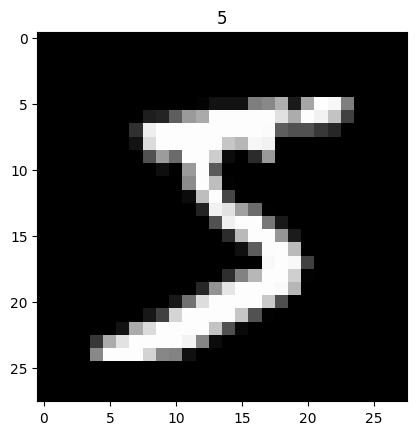

In [37]:
plt.imshow(image, 'gray')
plt.title(y_train[0])
plt.show()

### CNN 레이어에 삽입하기 위한 배열 편집
* 반드시 4차원 형태의 데이터를 유지해야 한다.
  * 이미지는 3차원(높이, 세로, RGB 채널수)이기 때문에 batch 크기까지 포함하여 4차원 배열이 필요하다.
* `(N, H, W, C)` -> `(배치크기, 높이, 가로, 채널수)`
* MNIST 손글씨 이미지 : 높이 - 28px, 가로 - 28px, 채널 - 1ch
* 1장의 이미지 - `(28, 28)` -> `(1, 28, 28, 1)`로 바꿔줘야 한다.

In [38]:
# [배치, 스프레드 연산자, 채널]로 구성된다.
#   스프레드 연산자(...) => 내가 원하는 차원의 모든 값을 가지고 오는 것

# image = image[tf.newaxis, :, :, tf.newaxis] 와 동일
image = image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

## Conv 레이어 사용하기
(convolution: 합성곱)\
keras의 대표적인 CNN 레이어는 두가지가 있다.
1. Conv2D
  * `stride`가 **2 방향**으로 움직인다.( 가로, 세로 )
  * **이미지 분석**을 위해 사용되는 일반적인 합성곱 레이어
2. Conv1D
  * `stride`가 **1 방향**으로 움직인다. (세로)
  * **텍스트 분석**을 위해 사용되는 레이어. ( 대표적인 예 `char CNN` )

## Conv2D 매개변수 확인
* `filters` : 필터의 개수 ($C_{out}$)
  * 출력특징맵의 필터 개수
* `kernel_size`: 필터의 크기 ($K_H$, $K_W$)
* `strides` : 몇 개의 픽셀을 스킵하면서 필터가 훑게 할지 결정 (stride가 커지면 출력 특징맵의 크기가 줄어든다)
* `padding`: 0으로 쌓여진 패딩을 만들 것인지에 대한 설정
  * `VALID` : 패딩을 만들지 않는다.
  * `SAME`  : 한개 짜리 패딩 생성 - 이미지 주변을 한줄로 감싸기
* `activation`: 활성화 함수 지정하기. 따로 지정하지 않고 추후에 레이어로 추가 가능


In [39]:
# filters => 필터의 가로, 세로 크기. 대부분 가로 세로 길이가 동일한 홀수로 지정
#   kernel_size => 이동 크기. 대부분 가로 세로 길이 동일하게 적용
#   padding => 패딩 적용 여부
#   activation => 활성화함수 적용 (아래 함수로 넣지 않고 별도 레이어로 추가 가능)
#   kernel_size, strides 모두 튜플로 넣지 않아도 자동으로 정방 필터 적용된다.

tf.keras.layers.Conv2D(
    filters=3,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='SAME',
    activation='relu'
)

### Convolution 레이어 시각화

In [41]:
image = tf.cast(image, dtype=tf.float32)
image.dtype

tf.float32

In [42]:
layer = tf.keras.layers.Conv2D(
    filters=5,
    kernel_size=3,
    strides=1,
    padding='SAME'
)

In [43]:
# layer(image) => layer에 image를 통과시킨다.
#   filters=5를 적용하여 필터(채널)이 5개 => 출력특징맵 또한 5개 생성되었다.

output = layer(image)
output.shape

TensorShape([1, 28, 28, 5])

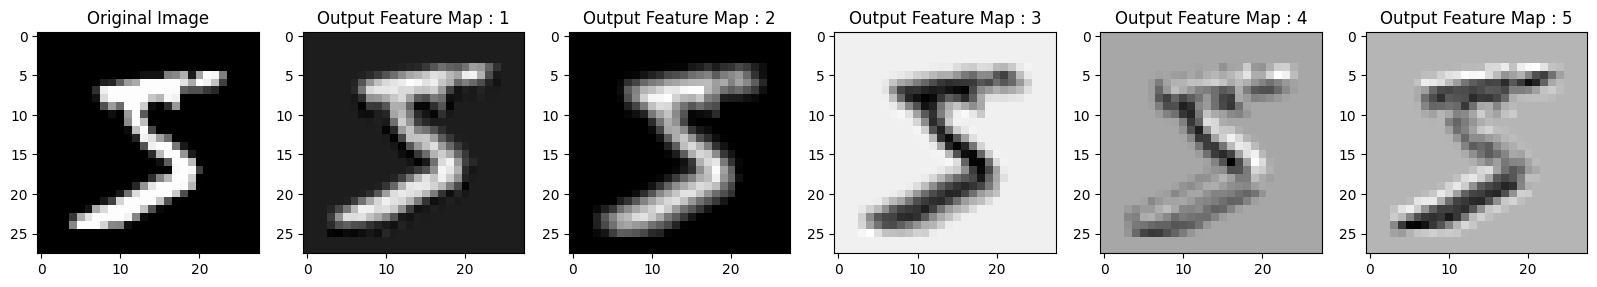

In [45]:
# 이미지에 필터를 씌우면 아래와 같이 조금씩 변화된 이미지 출력됨을 알 수 있다.

_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))
axes[0].imshow(image[0, ..., 0], cmap='gray')
axes[0].set_title("Original Image")

for idx, ax in enumerate(axes[1:]):
  ax.set_title("Output Feature Map : {}".format(idx + 1))
  ax.imshow(output[0, ..., idx], cmap='gray')

plt.show()

### Filter 시각화 하기
* CNN에서의 Filter는 실제 CNN 레이어가 이미지의 무엇을 보고 있는가를 이야기한다.
* `keras`의 레이어들은 `get_weights()` 함수를 이용해서 편향과, 가중치 등을 볼 수 있다.

In [49]:
# conv2d 레이어 구성 => (필터세로, 필터가로, 입력특징맵의 채널개수, 출력특징맵의 채널개수)
#   weights[0] => 가중치가 들어있다.
#   weights[1] => 편향이 들어있다.

weights = layer.get_weights()

In [50]:
# get_weights() => 레이어의 가중치와 편향 상태를 볼 수 있다.

print("가중치(필터)의 형상 : {}".format(weights[0].shape))
print("편향의 형상 : {}".format(weights[1].shape))

가중치(필터)의 형상 : (3, 3, 1, 5)
편향의 형상 : (5,)


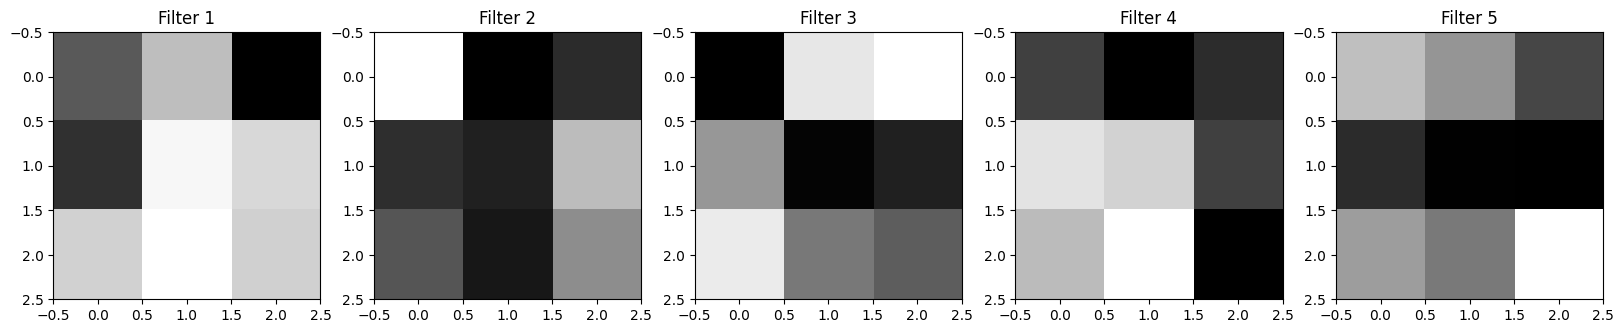

In [51]:
# 아직 학습 전으로, 레이어를 삽입하는 과정에 있기 때문에 필터만으로 내용 알 수 없다.
#   학습을 통해 점차 이미지가 나타내는 내용이 시각화된다.

_, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 10))

for idx, ax in enumerate(axes):
  ax.set_title("Filter {}".format(idx + 1))
  ax.imshow(weights[0][..., 0, idx], cmap='gray')

plt.show()

## ReLU 레이어 사용하기
- 이미지 분석에서 주로 ReLU가 사용된다.
- 이미지에서 음수 데이터는 필요가 없기 때문에, 필요 없는 음수를 제거하고 의미있는 양수를 강조하기 위해 ReLU가 사용된다.
  - 픽셀은 항상 0에서 255 사이의 양수이다.
  - 음수가 나오면, 보고자 하는 내용이 아니라는 의미이다.

In [52]:
import numpy as np
np.min(output), np.max(output)

(-287.73172, 298.1891)

In [53]:
# act_output => 합성곱의 결과가 활성화 레이어로 들어간다.

act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output)
act_output.shape

TensorShape([1, 28, 28, 5])

In [54]:
np.min(act_output), np.max(act_output)

(0.0, 298.1891)

### ReLU 시각화

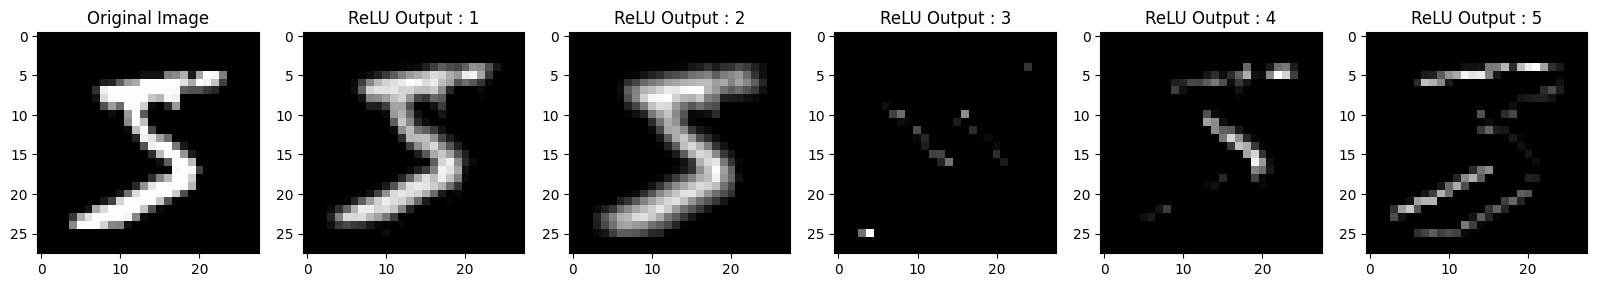

In [55]:
# 검정색 부분은 볼 필요가 없는 부분이다.
#   음수를 지우니 이미지가 많이 지워진 상태임을 알 수 있다.

_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))

axes[0].imshow(image[0, ..., 0], cmap='gray')
axes[0].set_title("Original Image")

for idx, ax in enumerate(axes[1:]):
  ax.set_title("ReLU Output : {}".format(idx + 1))
  ax.imshow(act_output[0, ..., idx], cmap='gray')

plt.show()

## MaxPooling 레이어 사용하기
- pooling의 average pooling과 max pooling 중 거의 대부분 max pooling이 많이 사용된다.
- pooling 과정을 통해 이미지 축소 및 정보의 종합을 구현할 수 있다.
- 과정:
  - filter가 겹치지 않게 map에 배치된 후 pooling 작업이 수행된다.
  - 각 filter 자리에서 가장 큰 값을 모아 결과값 도출한다.
  - output feature map의 크기를 절반으로 줄일 수 있다.

In [56]:
# act_output = tf.keras.layers.ReLU()(output) 으로 위에서 정의
#   이미지 크기를 줄이면 이미지를 알아볼 수 있는 정보도 줄어들지만, 최소한의 특징만 남아있다면 상관없다.
#   ex. 강아지가 강아지로 구분만 되면 됨. 필터가 학습하면서 강아지의 특정 부분들만 인식한다고 생각하기

pool_layer = tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
    strides=(2, 2),
    padding='SAME'
)
pool_output = pool_layer(act_output)
pool_output.shape

TensorShape([1, 14, 14, 5])

### MaxPooling 시각화

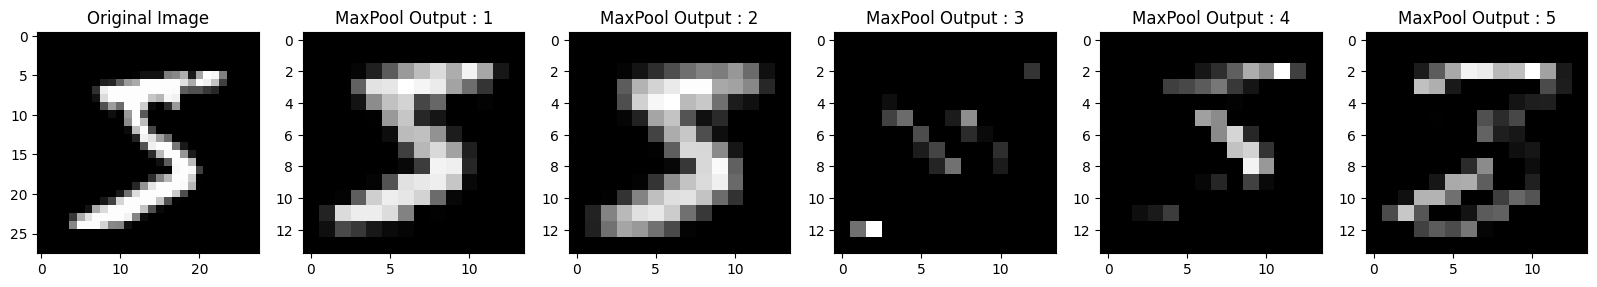

In [57]:
# feature extraction => 데이터 양을 줄이되 알 수 있는 정보들을 계속하여 획득하는 것
#   feature extraction (특징 추출) 과정이 많이 반복될수록 특징을 더욱 잘 파악할 수 있게 된다.

_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))

axes[0].imshow(image[0, ..., 0], cmap='gray')
axes[0].set_title("Original Image")

for idx, ax in enumerate(axes[1:]):
  ax.set_title("MaxPool Output : {}".format(idx + 1))
  ax.imshow(pool_output[0, ..., idx], cmap='gray')

plt.show()

**여기까지의 과정이 특징 추출 과정 (feature extraction)**

## Flatten 레이어 확인하기
- MaxPooling까지는 특징 추출 과정(Feature Extraction)
  - MaxPooling 과정까지 거쳐 학습을 완료하면, 예측하는 과정이 필요하다.
  - Feature Extraction은 예측을 위한 과정이 아니다.
  - 데이터(이미지)에 대한 특징만 추출하기 위한 목적을 갖는다.
- 예측을 수행하기 위해서는 Fully Connected 과정이 필요하다
  - Dense 레이어 사용
  - Fully Connected Layer를 사용하려면 반드시 데이터가 **평탄화(Flatten)**되어 있어야 한다.
  - 평탄화 작업 후 Dense Layer로 예측을 수행한다.

In [59]:
# Flatten() => 평탄화 작업 수행
#   flatten_output => 평탄화한 레이어에 pool_output 데이터를 넣는다. (maxpooling까지 완료된 데이터)

flatten_layer = tf.keras.layers.Flatten()
flatten_output = flatten_layer(pool_output)

flatten_output.shape

TensorShape([1, 980])

## Dense 레이어 확인하기
- 계산 과정 $WX+b$를 하기 위한 Dense Layer
- Fully Connected Layer라고도 한다.

In [63]:
# 유닛이 32개인 Dense Layer (은닉층)
dense_layer = tf.keras.layers.Dense(32, activation='relu')
dense_output = dense_layer(flatten_output)

dense_output.shape

TensorShape([1, 32])

In [64]:
# 항상 마지막에 위치하여 Dense Layer로 예측결과를 내보내는 출력층
#   0~9의 숫자를 그림으로 나타낸 손글씨 데이터 세트가 클래스이기 때문에
#   10개의 클래스 수와 동일하게 출력층 유닛(뉴런) 수도 10개로 설정됨

dense_layer2 = tf.keras.layers.Dense(10, activation='softmax')
dense_output2 = dense_layer2(dense_output)

dense_output2.shape

TensorShape([1, 10])

## Sequential Model로 MNIST 분류기 만들기
- tensorflow에서 적용했었던 레이어 객체를 가져와서 함수처럼 사용하는 방식으로, functional api라고 한다.
- 값을 직접적으로 넘길 필요없이 레이어만 배치해도 되는 방식이다.

**Fully Connected Layer 모델 미리 생성**

In [65]:
# 실제 프로젝트할 때는 논문에 의해 구현된 모델을 사용하여 어느정도 성능을 보장할 수도 있다.
#   flatten()도 은닉층을 구성하기 위한 최초작업이므로 은닉층 구간에 포함시켜도 무관

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, ReLU, MaxPool2D, Flatten, Dense, Input

model = Sequential([

        # 입력층
        Input(shape=(28, 28, 1)),

        # 특성 추출
        Conv2D(filters=32, kernel_size=3, padding='SAME'),
        ReLU(),
        Conv2D(filters=32, kernel_size=3, padding='SAME'),
        ReLU(),
        MaxPool2D(pool_size=(2, 2)),

        # 은닉층
        Flatten(),

        Dense(512, activation='relu'),

        # 출력층
        Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 re_lu_1 (ReLU)              (None, 28, 28, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 re_lu_2 (ReLU)              (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 6272)              0         
                                                        

**모델 컴파일하여 어떻게 훈련할 것인지 지정**

In [70]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

**feature와 label 데이터의 형태 확인**

In [71]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

**X 데이터에 채널 차원 추가**

In [72]:
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**이미지 정규화 작업**

In [73]:
X_train = X_train / 255.0
X_test = X_test / 255.0

**훈련**

In [74]:
model.fit(X_train,
          y_train,
          validation_split=0.2,
          epochs=10,
          batch_size=32,
          shuffle=True)

Epoch 1/10
1500/1500 [==============================] - 230s 152ms/step - loss: 0.1161 - acc: 0.9636 - val_loss: 0.0487 - val_acc: 0.9851
Epoch 2/10
1500/1500 [==============================] - 219s 146ms/step - loss: 0.0372 - acc: 0.9882 - val_loss: 0.0469 - val_acc: 0.9876
Epoch 3/10
1500/1500 [==============================] - 209s 139ms/step - loss: 0.0209 - acc: 0.9930 - val_loss: 0.0454 - val_acc: 0.9877
Epoch 4/10
1500/1500 [==============================] - 209s 139ms/step - loss: 0.0154 - acc: 0.9952 - val_loss: 0.0563 - val_acc: 0.9850
Epoch 5/10
1500/1500 [==============================] - 204s 136ms/step - loss: 0.0109 - acc: 0.9964 - val_loss: 0.0594 - val_acc: 0.9851
Epoch 6/10
1500/1500 [==============================] - 197s 131ms/step - loss: 0.0100 - acc: 0.9966 - val_loss: 0.0501 - val_acc: 0.9884
Epoch 7/10
1500/1500 [==============================] - 166s 110ms/step - loss: 0.0068 - acc: 0.9980 - val_loss: 0.0686 - val_acc: 0.9851
Epoch 8/10
1500/1500 [============

## 훈련 완료 후 필터 시각화

In [75]:
conv_layers = [layer for layer in model.layers if layer.__class__.__name__ == "Conv2D"]

1 층의 Conv Layer 필터


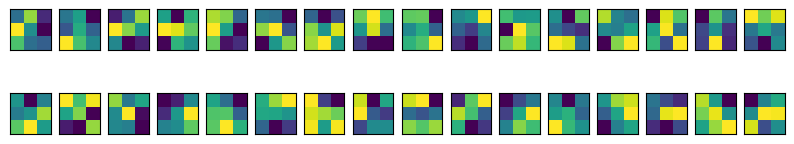

2 층의 Conv Layer 필터


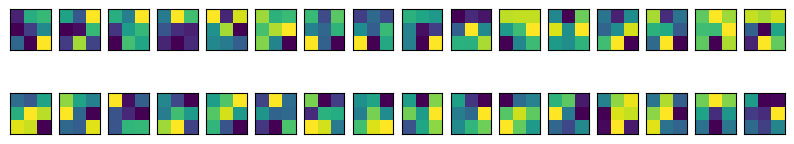

In [76]:
# 모델의 구성 단계를 아는 게 중요 (입력층 특성추출 은닉층 출력층)
#   conv가 있으면 => feature extraction 단
for i, conv_layer in enumerate(conv_layers):
  print(f"{i+1} 층의 Conv Layer 필터")

  weights = conv_layer.get_weights()[0]

  _, axes = plt.subplots(nrows=int(weights.shape[-1]/16), ncols=16, figsize=(10, int(weights.shape[-1]/16)))

  for idx, ax in enumerate(axes.ravel()):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(weights[..., 0, idx])

  plt.show()

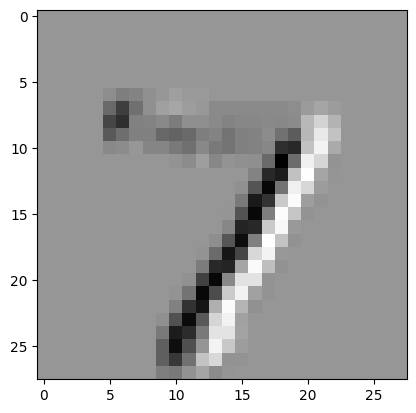

In [77]:
image = conv_layers[0](X_test[0].reshape(1, 28, 28, 1))

plt.imshow(image[0, ..., 0], 'gray')
plt.show()

# 사전학습 모델을 활용한 전이학습
- 배경 \
  - MNIS, CIFAR10을 가지고 AI 이미지 분류 성능을 확인한는 대회 '이미지넷'
  - 해당 대회에서 우수한 성적을 받은 모델을 keras로 구현한 게 pretrained model loading
- 전이학습
  - 이미 구현 및 성능 검증되어 학습된 모델을 가지고 와서 나의 데이터를 넣은 추가적인 학습을 진행하는 것
  - keras applications 모듈

## Keras Pretrained Model Loading

In [78]:
# 가장 최신화되고 자주 사용하는 모델은 ResNet50
#   모델 옆 숫자는 레이어의 개수를 의미한다.
#   가중치가 있는 층만 세기 때문에 훨씬 가볍게 학습 가능하다. (pooling 등 고려X)

#from tensorflow.keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import VGG16, ResNet50, ResNet50V2, Xception

**원본 모델의 구조 확인 가능**

In [79]:
# 아래 표에서 원본 모델의 fully connected 과정을 확인할 수 있다.
#   input_1 => 입력층
#   block1_conv1 ~ block5_pool => feature extraction
#   flatten ~ fc2 => 은닉층
#   predictions(Dense) => 출력층

model = VGG16()
model.summary()

553467096/553467096 [==============================] - 7s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

**전이학습을 위해 feature extraction 부분만 불러오기**

In [81]:
# include_top=False => fully connected layer가 없어지고 feature extraction만 불러올 수 있다.
#   특징 추출만 가져와서 이후 과정을 내 맘대로 변환하기 위함

model = VGG16(input_shape=(32, 32, 3), include_top=False, weights='imagenet')
model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

## Functional Model 확인

In [82]:
print('model:', model)
print('model output:', model.output)

model: <keras.src.engine.functional.Functional object at 0x7ce52d092c20>
model output: KerasTensor(type_spec=TensorSpec(shape=(None, 1, 1, 512), dtype=tf.float32, name=None), name='block5_pool/MaxPool:0', description="created by layer 'block5_pool'")


## Pretrained 모델을 기반으로 CIFAR 10 분류 모델 재생성

In [83]:
IMAGE_SIZE = 32
BATCH_SIZE = 64

In [84]:
# 재생성, 커스텀한 모델 결과값

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

# include_top=False로 기존 imagenet용 classifier 층들을 다 제거, feature extraction만 남긴다.
#   weight는 전이학습을 위해 imagenet 학습된 weight를 초기 weight로 사용.
#   base_model.output => feature extraction의 마지막 부분, 즉 최종 특징 추출 단계만 가지고 오겠다는 의미

# input_tensor 객체 만들어서 아래와 같이 작성할 수도 있다.
#   input_tensor => Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
#   base_model => VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')

base_model = VGG16(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, weights='imagenet')
bm_output = base_model.output

# 마지막 특징 추출 부분만 가지고 와서 평탄화 ~ 예측

# base model의 output을 입력으로 CIFAR10용 Classification layer를 재 구성.
# Flatten 레이어를 GlobalAveragePooling2D로 변경
x = GlobalAveragePooling2D()(bm_output)   ## GAP => 평탄화 기법 중 하나로, flatten의 단점을 개선하기 위해 제시된 모델
                                          ## flatten => 채널 수가 512개 미만일 때, GAP => 채널 수가 512개 이상일 때 사용
                                          ## GAP => 7*7*512로 채널이 512일 때, 7*7*1씩 512번 각각의 평균을 구해서 1차원 배열로 쌓아주는 것 (flatten보다 파라미터 값 줄어듦, 25000->512)
# x = Dropout(rate=0.5)(x)
x = Dense(50, activation='relu', name='fc1')(x)
# x = Dropout(rate=0.2)(x)
output = Dense(10, activation='softmax', name='output')(x)

#model = Model(inputs=input_tensor, outputs=output)
model = Model(inputs=base_model.input, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     